In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
headers = ['Column1']
df = pd.read_csv('/content/drive/MyDrive/ModSim Data/India_GDP_Trade.dat',delimiter='\t', header=None, names=headers)
# Split each string in the 'Column1' into a list of numbers
df['Column1'] = df['Column1'].str.split()

# Expand the list of numbers into separate columns
df = pd.concat([df, df['Column1'].apply(pd.Series).astype(float)], axis=1)

# Drop the original 'Column1' with strings
df.drop('Column1', axis=1, inplace=True)

new_columns = {0: 'year',
               1: 'annual_gdp',
               2: 'annual_trade'}
df.rename(columns=new_columns,inplace=True)


In [ ]:
df['year'] = df['year'].astype(int)
# df['year'] = df['year'] + 1913
df

,year,annual_gdp,annual_trade
0,0,3.702988e+10,4.183204e+09
1,1,3.923243e+10,4.025704e+09
2,2,4.216148e+10,4.300804e+09
3,3,4.842192e+10,4.932905e+09
4,4,5.648029e+10,5.315105e+09
...,...,...,...
56,56,2.294798e+12,9.198120e+11
57,57,2.651473e+12,1.080276e+12
58,58,2.701112e+12,1.177648e+12
59,59,2.870504e+12,1.130599e+12


In [ ]:
def logistic_equation(t,x,k,a):
  numerator = x*k*np.exp(a*t)
  denominator = k+ (x*(np.exp(a*t)-1))
  return numerator/denominator

In [ ]:
k_gdp_india=6e12
a_gdp_india = 0.080
x_0_gdp_india = 3.7e10
simulated_gdp_india = logistic_equation(df['year'],x_0_gdp_india,k_gdp_india,a_gdp_india)

In [ ]:
k_trade_india=3e12
a_trade_india = 0.1
x_0_trade_india = 4e9
simulated_trade_india = logistic_equation(df['year'],x_0_trade_india,k_trade_india,a_trade_india)

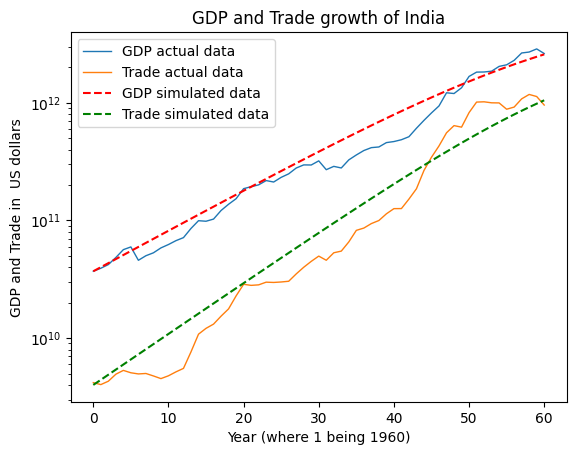

In [ ]:
plt.plot(df['year'], df['annual_gdp'],lw=1)
plt.plot(df['year'], df['annual_trade'],lw=1)

plt.title('GDP and Trade growth of India')


plt.plot(df['year'],simulated_gdp_india, linestyle='dashed', color='r')

plt.plot(df['year'],simulated_trade_india, linestyle='dashed', color='g')
plt.yscale('log')
plt.ylabel('GDP and Trade in  US dollars')
plt.xlabel('Year (where 1 being 1960)')
plt.legend(['GDP actual data','Trade actual data','GDP simulated data','Trade simulated data'])

plt.show()

In [ ]:
diff = (df['annual_gdp'] - simulated_gdp_india)/simulated_gdp_india
u_gdp = np.mean(diff)
print(u_gdp)
std_gdp = np.std(diff)
print(std_gdp)


diff = (df['annual_trade'] - simulated_trade_india)/simulated_trade_india
u_trade = np.mean(diff)
print(u_trade)
std_trade = np.std(diff)
print(std_trade)

-0.13587085598636395
0.17282582353853485
-0.14452747663957105
0.35665052255831187


In [ ]:
#Time when India will cross 4 Trillion dollar economy
x = 4e12
tnl = 1960 + 1/a_gdp_india * np.log((x*(k_gdp_india-x_0_gdp_india))/(x_0_gdp_india*(k_gdp_india-x)))
print(tnl.astype(int))

x = 5e12
tnl = 1960 + 1/a_gdp_india * np.log((x*(k_gdp_india-x_0_gdp_india))/(x_0_gdp_india*(k_gdp_india-x)))
print(tnl.astype(int))

2032
2043


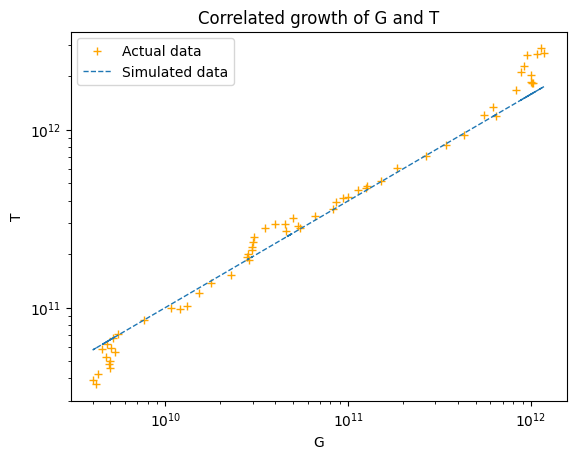

In [ ]:
V = df['annual_gdp']
U = df['annual_trade']
plt.scatter(U,V,marker='+',lw=1,color='orange')

V_simulated = 1e5*np.power(U,0.6)
plt.plot(U,V_simulated,linestyle='dashed',lw=1)
plt.yscale('log')
plt.xscale('log')
plt.title('Correlated growth of G and T')
plt.legend(['Act   ual data','Simulated data'])
plt.xlabel('G')
plt.ylabel('T')
plt.show()

In [ ]:
headers = ['Column1']
df = pd.read_csv('/content/drive/MyDrive/ModSim Data/Japan_GDP_Trade.dat',delimiter='\t', header=None, names=headers)
# Split each string in the 'Column1' into a list of numbers
df['Column1'] = df['Column1'].str.split()

# Expand the list of numbers into separate columns
df = pd.concat([df, df['Column1'].apply(pd.Series).astype(float)], axis=1)

# Drop the original 'Column1' with strings
df.drop('Column1', axis=1, inplace=True)

new_columns = {0: 'year',
               1: 'annual_gdp',
               2: 'annual_trade'}
df.rename(columns=new_columns,inplace=True)


In [ ]:
df['year'] = df['year'].astype(int)
# df['year'] = df['year'] + 1913
df

,year,annual_gdp,annual_trade
0,0,4.430000e+10,9.310000e+09
1,1,5.350000e+10,1.080000e+10
2,2,6.070000e+10,1.140000e+10
3,3,6.950000e+10,1.310000e+10
4,4,8.170000e+10,1.570000e+10
5,5,9.100000e+10,1.790000e+10
6,6,1.060000e+11,2.070000e+10
7,7,1.240000e+11,2.360000e+10
8,8,1.470000e+11,2.800000e+10
9,9,1.720000e+11,3.360000e+10


In [ ]:
k_gdp_japan=5.2e12
a_gdp_japan = 0.175
x_0_gdp_japan = 5e10
simulated_gdp_japan = logistic_equation(df['year'],x_0_gdp_japan,k_gdp_japan,a_gdp_japan)

In [ ]:
k_trade_japan=2e12
a_trade_japan = 0.135
x_0_trade_japan = 10e9
simulated_trade_japan = logistic_equation(df['year'],x_0_trade_japan,k_trade_japan,a_trade_japan)

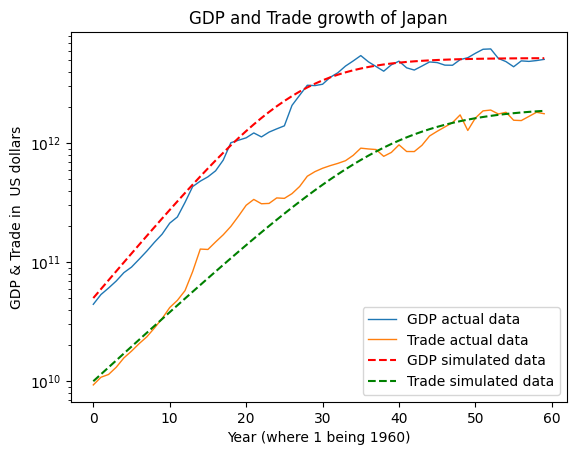

In [ ]:
plt.plot(df['year'], df['annual_gdp'],lw=1)
plt.plot(df['year'], df['annual_trade'],lw=1)

plt.title('GDP and Trade growth of Japan')


plt.plot(df['year'],simulated_gdp_japan, linestyle='dashed', color='r')

plt.plot(df['year'],simulated_trade_japan, linestyle='dashed', color='g')
plt.yscale('log')
plt.ylabel('GDP & Trade in  US dollars')
plt.xlabel('Year (where 1 being 1960)')
plt.legend(['GDP actual data','Trade actual data','GDP simulated data','Trade simulated data'])



plt.show()

In [ ]:
diff = (df['annual_gdp'] - simulated_gdp_japan)/simulated_gdp_japan
u_gdp = np.mean(diff)
print(u_gdp)
std_gdp = np.std(diff)
print(std_gdp)


diff = (df['annual_trade'] - simulated_trade_japan)/simulated_trade_japan
u_trade = np.mean(diff)
print(u_trade)
std_trade = np.std(diff)
print(std_trade)

-0.08325802338915377
0.13830755263960381
0.190331386245024
0.3651000632290671


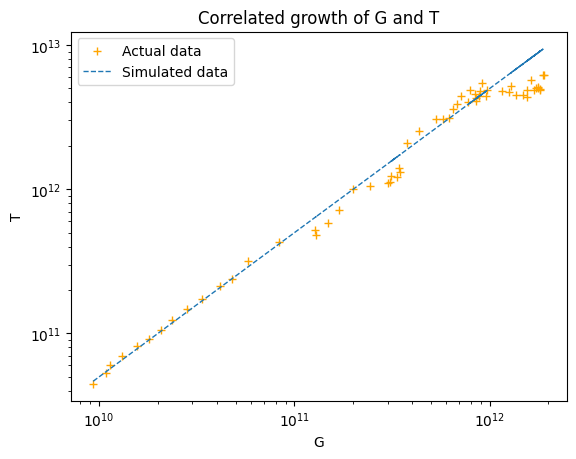

In [ ]:
V = df['annual_gdp']
U = df['annual_trade']
plt.scatter(U,V,marker='+',lw=1,color='orange')

V_simulated = 5*np.power(U,1)
plt.plot(U,V_simulated,linestyle='dashed',lw=1)
plt.yscale('log')
plt.xscale('log')
plt.title('Correlated growth of G and T')
plt.legend(['Actual data','Simulated data'])
plt.xlabel('G')
plt.ylabel('T')
plt.show()

In [ ]:
headers = ['Column1']
df = pd.read_csv('/content/drive/MyDrive/ModSim Data/China_GDP_Trade.dat',delimiter='\t', header=None, names=headers)
# Split each string in the 'Column1' into a list of numbers
df['Column1'] = df['Column1'].str.split()

# Expand the list of numbers into separate columns
df = pd.concat([df, df['Column1'].apply(pd.Series).astype(float)], axis=1)

# Drop the original 'Column1' with strings
df.drop('Column1', axis=1, inplace=True)

new_columns = {0: 'year',
               1: 'annual_gdp',
               2: 'annual_trade'}
df.rename(columns=new_columns,inplace=True)
df['year'] = df['year'].astype(int)
# df['year'] = df['year'] + 1913
df


,year,annual_gdp,annual_trade
0,0,5.970000e+10,5.215696e+09
1,1,5.010000e+10,3.684296e+09
2,2,4.720000e+10,3.286213e+09
3,3,5.070000e+10,3.481193e+09
4,4,5.970000e+10,3.960517e+09
...,...,...,...
56,56,1.120000e+13,4.140000e+12
57,57,1.230000e+13,4.630000e+12
58,58,1.390000e+13,5.200000e+12
59,59,1.427994e+13,5.117560e+12


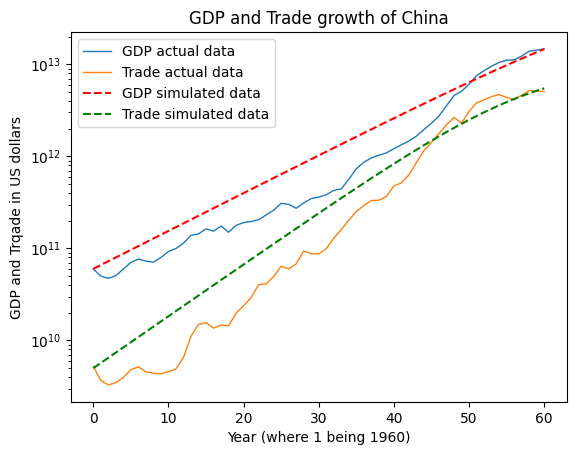


-0.3598881751803906
0.2473144272459445
-0.356902559993096
0.3365221270902638


In [ ]:
k_gdp_china=80e12
a_gdp_china = 0.095
x_0_gdp_china = 6e10
simulated_gdp_china = logistic_equation(df['year'],x_0_gdp_china,k_gdp_china,a_gdp_china)

k_trade_china=10e12
a_trade_china = 0.13
x_0_trade_china = 5e9
simulated_trade_china = logistic_equation(df['year'],x_0_trade_china,k_trade_china,a_trade_china)



plt.plot(df['year'], df['annual_gdp'],lw=1)
plt.plot(df['year'], df['annual_trade'],lw=1)

plt.title('GDP and Trade growth of China')


plt.plot(df['year'],simulated_gdp_china, linestyle='dashed', color='r')

plt.plot(df['year'],simulated_trade_china, linestyle='dashed', color='g')
plt.yscale('log')
plt.ylabel('GDP and Trqade in US dollars')
plt.xlabel('Year (where 1 being 1960)')
plt.legend(['GDP actual data','Trade actual data','GDP simulated data','Trade simulated data'])


plt.show()
print()
diff = (df['annual_gdp'] - simulated_gdp_china)/simulated_gdp_china
u_gdp = np.mean(diff)
print(u_gdp)
std_gdp = np.std(diff)
print(std_gdp)


diff = (df['annual_trade'] - simulated_trade_china)/simulated_trade_china
u_trade = np.mean(diff)
print(u_trade)
std_trade = np.std(diff)
print(std_trade)

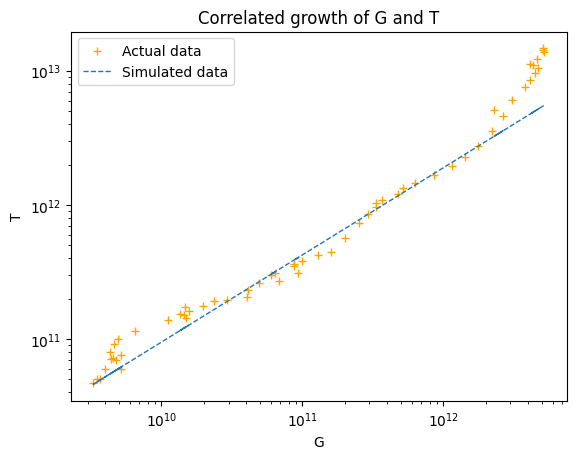

In [ ]:
V = df['annual_gdp']
U = df['annual_trade']
plt.scatter(U,V,marker='+',lw=1,color='orange')

V_simulated = 3e4*np.power(U,0.65)
plt.plot(U,V_simulated,linestyle='dashed',lw=1)
plt.yscale('log')
plt.xscale('log')
plt.title('Correlated growth of G and T')
plt.legend(['Actual data','Simulated data'])

plt.xlabel('G')
plt.ylabel('T')
plt.show()

In [ ]:
headers = ['Column1']
df = pd.read_csv('/content/drive/MyDrive/ModSim Data/Germany_GDP_Trade.dat',delimiter='\t', header=None, names=headers)
# Split each string in the 'Column1' into a list of numbers
df['Column1'] = df['Column1'].str.split()

# Expand the list of numbers into separate columns
df = pd.concat([df, df['Column1'].apply(pd.Series).astype(float)], axis=1)

# Drop the original 'Column1' with strings
df.drop('Column1', axis=1, inplace=True)

new_columns = {0: 'year',
               1: 'annual_gdp',
               2: 'annual_trade'}
df.rename(columns=new_columns,inplace=True)
df['year'] = df['year'].astype(int)
# df['year'] = df['year'] + 1913
df


,year,annual_gdp,annual_trade
0,0,1.103548e+11,3.499428e+10
1,1,1.278152e+11,3.942301e+10
2,2,1.532836e+11,4.710821e+10
3,3,2.036886e+11,6.457583e+10
4,4,2.276808e+11,8.413472e+10
5,5,2.508530e+11,9.007342e+10
6,6,2.657394e+11,1.019646e+11
7,7,3.070264e+11,1.169892e+11
8,8,3.785986e+11,1.407652e+11
9,9,4.506062e+11,1.767483e+11


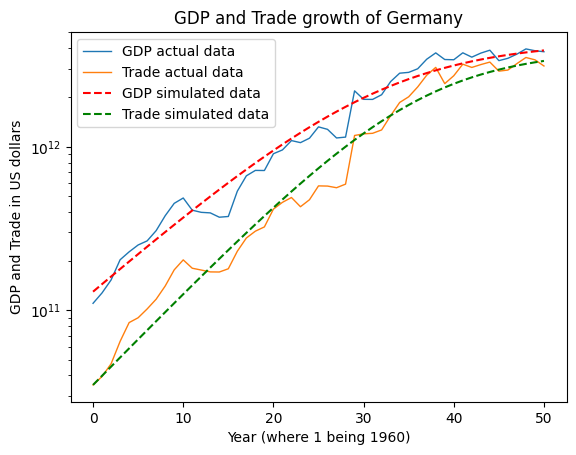


-0.00306601626145695
0.16501250874108167
0.05616740893151533
0.23387592456094278


In [ ]:
k_gdp_germany=4.4e12
a_gdp_germany = 0.11
x_0_gdp_germany = 1.3e11
simulated_gdp_germany = logistic_equation(df['year'],x_0_gdp_germany,k_gdp_germany,a_gdp_germany)

k_trade_germany=3.9e12
a_trade_germany = 0.13
x_0_trade_germany = 3.5e10
simulated_trade_germany = logistic_equation(df['year'],x_0_trade_germany,k_trade_germany,a_trade_germany)



plt.plot(df['year'], df['annual_gdp'],lw=1)
plt.plot(df['year'], df['annual_trade'],lw=1)

plt.title('GDP and Trade growth of Germany')


plt.plot(df['year'],simulated_gdp_germany, linestyle='dashed', color='r')

plt.plot(df['year'],simulated_trade_germany, linestyle='dashed', color='g')
plt.yscale('log')
plt.ylabel('GDP and Trade in US dollars')
plt.xlabel('Year (where 1 being 1960)')
plt.legend(['GDP actual data','Trade actual data','GDP simulated data','Trade simulated data'])


plt.show()
print()
diff = (df['annual_gdp'] - simulated_gdp_germany)/simulated_gdp_germany
u_gdp = np.mean(diff)
print(u_gdp)
std_gdp = np.std(diff)
print(std_gdp)


diff = (df['annual_trade'] - simulated_trade_germany)/simulated_trade_germany
u_trade = np.mean(diff)
print(u_trade)
std_trade = np.std(diff)
print(std_trade)

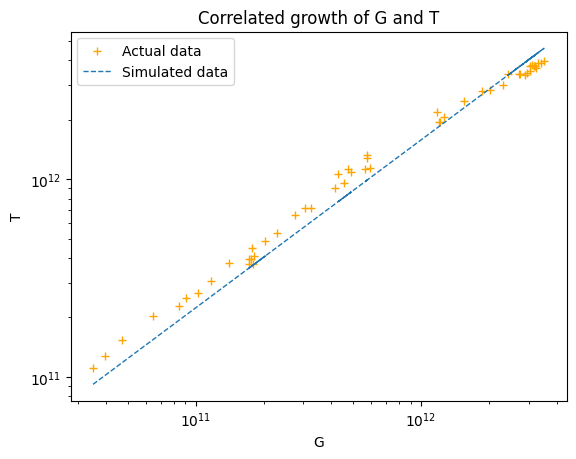

In [ ]:
V = df['annual_gdp']
U = df['annual_trade']
plt.scatter(U,V,marker='+',lw=1,color='orange')

V_simulated = 100*np.power(U,0.85)
plt.plot(U,V_simulated,linestyle='dashed',lw=1)
plt.yscale('log')
plt.xscale('log')
plt.title('Correlated growth of G and T')
plt.legend(['Actual data','Simulated data'])

plt.xlabel('G')
plt.ylabel('T')
plt.show()

UK

In [ ]:
headers = ['Column1']
df = pd.read_csv('/content/drive/MyDrive/ModSim Data/UK_GDP_Trade.dat',delimiter='\t', header=None, names=headers)
# Split each string in the 'Column1' into a list of numbers
df['Column1'] = df['Column1'].str.split()

# Expand the list of numbers into separate columns
df = pd.concat([df, df['Column1'].apply(pd.Series).astype(float)], axis=1)

# Drop the original 'Column1' with strings
df.drop('Column1', axis=1, inplace=True)

new_columns = {0: 'year',
               1: 'annual_gdp',
               2: 'annual_trade'}
df.rename(columns=new_columns,inplace=True)
df['year'] = df['year'].astype(int)
# df['year'] = df['year'] + 1913
df


,year,annual_gdp,annual_trade
0,0,7.323397e+10,3.023359e+10
1,1,7.774197e+10,3.078140e+10
2,2,8.124757e+10,3.147052e+10
3,3,8.656196e+10,3.336280e+10
4,4,9.440756e+10,3.656729e+10
...,...,...,...
56,56,2.690000e+12,1.570000e+12
57,57,2.660000e+12,1.640000e+12
58,58,2.860000e+12,1.800000e+12
59,59,2.830814e+12,1.794660e+12


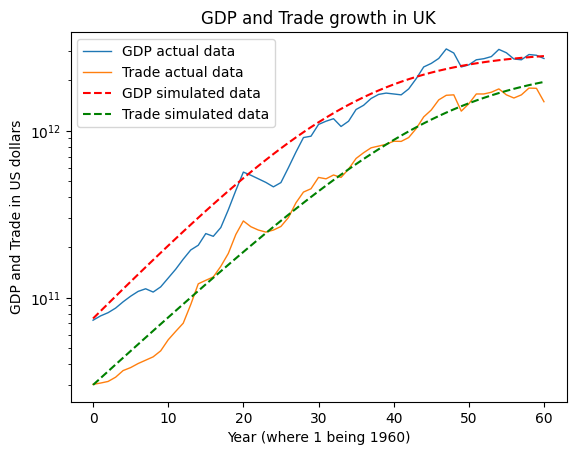


-0.10894473318435142
0.16374948004383302
0.005320545916772711
0.1665289425067246


In [ ]:
k_gdp_uk=3e12
a_gdp_uk = 0.105
x_0_gdp_uk = 7.5e10
simulated_gdp_uk = logistic_equation(df['year'],x_0_gdp_uk,k_gdp_uk,a_gdp_uk)

k_trade_uk=2.5e12
a_trade_uk = 0.095
x_0_trade_uk = 3e10
simulated_trade_uk = logistic_equation(df['year'],x_0_trade_uk,k_trade_uk,a_trade_uk)



plt.plot(df['year'], df['annual_gdp'],lw=1)
plt.plot(df['year'], df['annual_trade'],lw=1)

plt.title('GDP and Trade growth in UK')


plt.plot(df['year'],simulated_gdp_uk, linestyle='dashed', color='r')

plt.plot(df['year'],simulated_trade_uk, linestyle='dashed', color='g')
plt.yscale('log')
plt.ylabel('GDP and Trade in US dollars')
plt.xlabel('Year (where 1 being 1960)')
plt.legend(['GDP actual data','Trade actual data','GDP simulated data','Trade simulated data'])


plt.show()
print()
diff = (df['annual_gdp'] - simulated_gdp_uk)/simulated_gdp_uk
u_gdp = np.mean(diff)
print(u_gdp)
std_gdp = np.std(diff)
print(std_gdp)


diff = (df['annual_trade'] - simulated_trade_uk)/simulated_trade_uk
u_trade = np.mean(diff)
print(u_trade)
std_trade = np.std(diff)
print(std_trade)

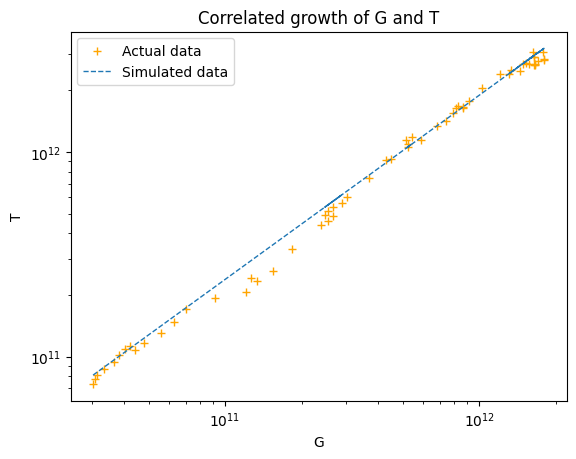

In [ ]:
V = df['annual_gdp']
U = df['annual_trade']
plt.scatter(U,V,marker='+',lw=1,color='orange')

V_simulated = 30*np.power(U,0.90)
plt.plot(U,V_simulated,linestyle='dashed',lw=1)
plt.yscale('log')
plt.xscale('log')
plt.title('Correlated growth of G and T')
plt.legend(['Actual data','Simulated data'])

plt.xlabel('G')
plt.ylabel('T')
plt.show()

USA

In [ ]:
headers = ['Column1']
df1 = pd.read_csv('/content/drive/MyDrive/ModSim Data/US_GDP.dat',delimiter='\t', header=None, names=headers)
# Split each string in the 'Column1' into a list of numbers
df1['Column1'] = df1['Column1'].str.split()

# Expand the list of numbers into separate columns
df1 = pd.concat([df1, df1['Column1'].apply(pd.Series).astype(float)], axis=1)

# Drop the original 'Column1' with strings
df1.drop('Column1', axis=1, inplace=True)

new_columns = {0: 'year',
               1: 'annual_gdp'}
df1.rename(columns=new_columns,inplace=True)
df1['year'] = df1['year'].astype(int)
# df1['year'] = df1['year'] + 1913
df1


,year,annual_gdp
0,0,5.430000e+11
1,1,5.630000e+11
2,2,6.050000e+11
3,3,6.390000e+11
4,4,6.860000e+11
...,...,...
56,56,1.870000e+13
57,57,1.950000e+13
58,58,2.060000e+13
59,59,2.143322e+13


In [ ]:
headers = ['Column1']
df2 = pd.read_csv('/content/drive/MyDrive/ModSim Data/US_Trade.dat',delimiter='\t', header=None, names=headers)
# Split each string in the 'Column1' into a list of numbers
df2['Column1'] = df2['Column1'].str.split()

# Expand the list of numbers into separate columns
df2 = pd.concat([df2, df2['Column1'].apply(pd.Series).astype(float)], axis=1)

# Drop the original 'Column1' with strings
df2.drop('Column1', axis=1, inplace=True)

new_columns = {0: 'year',
               1: 'annual_trade'}
df2.rename(columns=new_columns,inplace=True)
df2['year'] = df2['year'].astype(int)
# df2['year'] = df2['year'] + 1913
df2


,year,annual_trade
0,0,4.980000e+10
1,1,5.030000e+10
2,2,5.410000e+10
3,3,5.720000e+10
4,4,6.310000e+10
5,5,6.860000e+10
6,6,7.800000e+10
7,7,8.340000e+10
8,8,9.450000e+10
9,9,1.020000e+11


In [ ]:
df = pd.merge(df1, df2, on='year', how='inner')

df


,year,annual_gdp,annual_trade
0,0,5.430000e+11,4.980000e+10
1,1,5.630000e+11,5.030000e+10
2,2,6.050000e+11,5.410000e+10
3,3,6.390000e+11,5.720000e+10
4,4,6.860000e+11,6.310000e+10
5,5,7.440000e+11,6.860000e+10
6,6,8.150000e+11,7.800000e+10
7,7,8.620000e+11,8.340000e+10
8,8,9.430000e+11,9.450000e+10
9,9,1.020000e+12,1.020000e+11


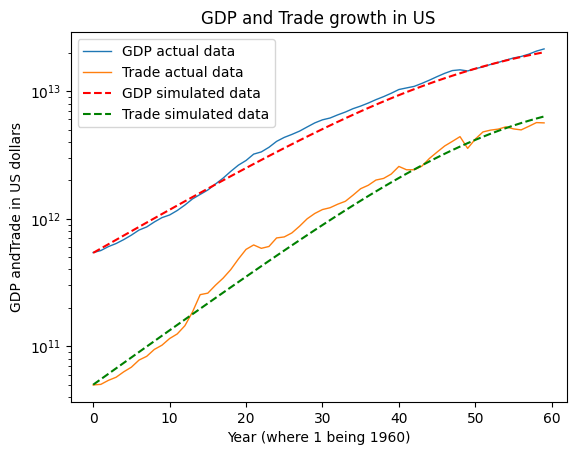


0.054416813709132074
0.08753539524726558
0.11624631933033759
0.2022932525817962


In [ ]:
k_gdp_us=30e12
a_gdp_us = 0.08
x_0_gdp_us = 5.4e11
simulated_gdp_us = logistic_equation(df['year'],x_0_gdp_us,k_gdp_us,a_gdp_us)

k_trade_us=10e12
a_trade_us = 0.099
x_0_trade_us = 5e10
simulated_trade_us = logistic_equation(df['year'],x_0_trade_us,k_trade_us,a_trade_us)



plt.plot(df['year'], df['annual_gdp'],lw=1)
plt.plot(df['year'], df['annual_trade'],lw=1)

plt.title('GDP and Trade growth in US')


plt.plot(df['year'],simulated_gdp_us, linestyle='dashed', color='r')

plt.plot(df['year'],simulated_trade_us, linestyle='dashed', color='g')
plt.yscale('log')
plt.ylabel('GDP andTrade in US dollars')
plt.xlabel('Year (where 1 being 1960)')
plt.legend(['GDP actual data','Trade actual data','GDP simulated data','Trade simulated data'])


plt.show()
print()
diff = (df['annual_gdp'] - simulated_gdp_us)/simulated_gdp_us
u_gdp = np.mean(diff)
print(u_gdp)
std_gdp = np.std(diff)
print(std_gdp)


diff = (df['annual_trade'] - simulated_trade_us)/simulated_trade_us
u_trade = np.mean(diff)
print(u_trade)
std_trade = np.std(diff)
print(std_trade)

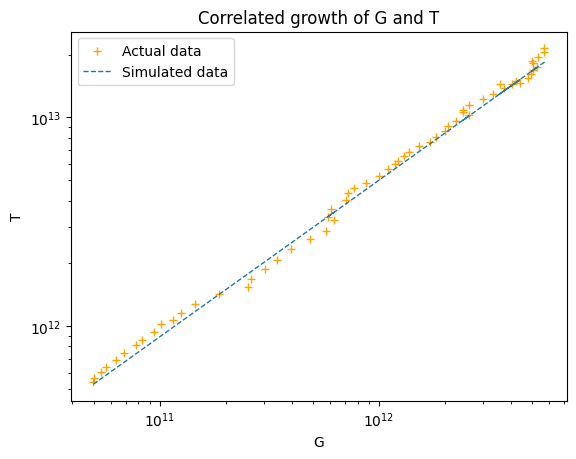

In [ ]:
V = df['annual_gdp']
U = df['annual_trade']
plt.scatter(U,V,marker='+',lw=1,color='orange')

V_simulated = 5e3*np.power(U,0.75)
plt.plot(U,V_simulated,linestyle='dashed',lw=1)
plt.yscale('log')
plt.xscale('log')
plt.title('Correlated growth of G and T')
plt.legend(['Actual data','Simulated data'])

plt.xlabel('G')
plt.ylabel('T')
plt.show()

In [ ]:
headers = ['Column1']
df_china = pd.read_csv('/content/drive/MyDrive/ModSim Data/China_GDP_Trade.dat',delimiter='\t', header=None, names=headers)
# Split each string in the 'Column1' into a list of numbers
df_china['Column1'] = df_china['Column1'].str.split()

# Expand the list of numbers into separate columns
df_china = pd.concat([df_china, df_china['Column1'].apply(pd.Series).astype(float)], axis=1)

# Drop the original 'Column1' with strings
df_china.drop('Column1', axis=1, inplace=True)

new_columns = {0: 'year',
               1: 'annual_gdp',
               2:'annual_trade'}
df_china.rename(columns=new_columns,inplace=True)
df_china['year'] = df_china['year'].astype(int)
# df_china['year'] = df_china['year'] + 1913
df_china


,year,annual_gdp,annual_trade
0,0,5.970000e+10,5.215696e+09
1,1,5.010000e+10,3.684296e+09
2,2,4.720000e+10,3.286213e+09
3,3,5.070000e+10,3.481193e+09
4,4,5.970000e+10,3.960517e+09
...,...,...,...
56,56,1.120000e+13,4.140000e+12
57,57,1.230000e+13,4.630000e+12
58,58,1.390000e+13,5.200000e+12
59,59,1.427994e+13,5.117560e+12


In [ ]:
df_us = pd.merge(df1, df2, on='year', how='inner')
df_us


,year,annual_gdp,annual_trade
0,0,5.430000e+11,4.980000e+10
1,1,5.630000e+11,5.030000e+10
2,2,6.050000e+11,5.410000e+10
3,3,6.390000e+11,5.720000e+10
4,4,6.860000e+11,6.310000e+10
5,5,7.440000e+11,6.860000e+10
6,6,8.150000e+11,7.800000e+10
7,7,8.620000e+11,8.340000e+10
8,8,9.430000e+11,9.450000e+10
9,9,1.020000e+12,1.020000e+11


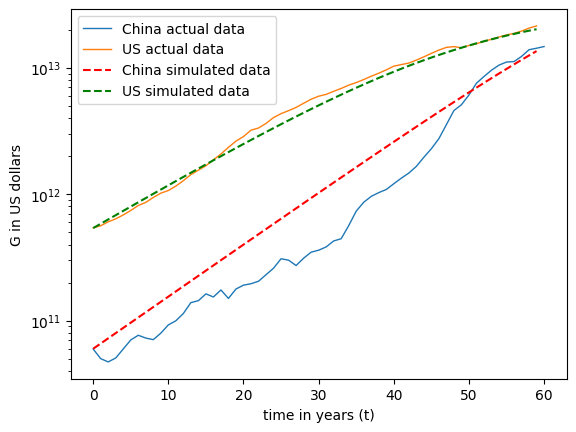

In [ ]:
k_gdp_us=30e12
a_gdp_us = 0.08
x_0_gdp_us = 5.4e11
simulated_gdp_us = logistic_equation(df['year'],x_0_gdp_us,k_gdp_us,a_gdp_us)



k_gdp_china=80e12
a_gdp_china = 0.095
x_0_gdp_china = 6e10
simulated_gdp_china = logistic_equation(df['year'],x_0_gdp_china,k_gdp_china,a_gdp_china)


plt.yscale('log')


plt.plot(df_china['year'], df_china['annual_gdp'],lw=1)
plt.plot(df_us['year'], df_us['annual_gdp'],lw=1)
plt.plot(df_us['year'],simulated_gdp_china, linestyle='dashed', color='r')
plt.plot(df_us['year'],simulated_gdp_us, linestyle='dashed', color='g')
plt.xlabel('time in years (t)')
plt.ylabel('G in US dollars')
plt.legend(['China actual data','US actual data','China simulated data','US simulated data'])
plt.yscale('log')


plt.show()


In [ ]:
headers = ['Column1']
df_india = pd.read_csv('/content/drive/MyDrive/ModSim Data/India_GDP_Trade.dat',delimiter='\t', header=None, names=headers)
# Split each string in the 'Column1' into a list of numbers
df_india['Column1'] = df_india['Column1'].str.split()

# Expand the list of numbers into separate columns
df_india = pd.concat([df_india, df_india['Column1'].apply(pd.Series).astype(float)], axis=1)

# Drop the original 'Column1' with strings
df_india.drop('Column1', axis=1, inplace=True)

new_columns = {0: 'year',
               1: 'annual_gdp',
               2:'annual_trade'}
df_india.rename(columns=new_columns,inplace=True)
df_india['year'] = df_india['year'].astype(int)
# df_india['year'] = df_india['year'] + 1913
df_india


,year,annual_gdp,annual_trade
0,0,3.702988e+10,4.183204e+09
1,1,3.923243e+10,4.025704e+09
2,2,4.216148e+10,4.300804e+09
3,3,4.842192e+10,4.932905e+09
4,4,5.648029e+10,5.315105e+09
...,...,...,...
56,56,2.294798e+12,9.198120e+11
57,57,2.651473e+12,1.080276e+12
58,58,2.701112e+12,1.177648e+12
59,59,2.870504e+12,1.130599e+12


In [ ]:
headers = ['Column1']
df_japan = pd.read_csv('/content/drive/MyDrive/ModSim Data/Japan_GDP_Trade.dat',delimiter='\t', header=None, names=headers)
# Split each string in the 'Column1' into a list of numbers
df_japan['Column1'] = df_japan['Column1'].str.split()

# Expand the list of numbers into separate columns
df_japan = pd.concat([df_japan, df_japan['Column1'].apply(pd.Series).astype(float)], axis=1)

# Drop the original 'Column1' with strings
df_japan.drop('Column1', axis=1, inplace=True)

new_columns = {0: 'year',
               1: 'annual_gdp',
               2:'annual_trade'}
df_japan.rename(columns=new_columns,inplace=True)
df_japan['year'] = df_japan['year'].astype(int)
# df_japan['year'] = df_japan['year'] + 1913
df_japan


,year,annual_gdp,annual_trade
0,0,4.430000e+10,9.310000e+09
1,1,5.350000e+10,1.080000e+10
2,2,6.070000e+10,1.140000e+10
3,3,6.950000e+10,1.310000e+10
4,4,8.170000e+10,1.570000e+10
5,5,9.100000e+10,1.790000e+10
6,6,1.060000e+11,2.070000e+10
7,7,1.240000e+11,2.360000e+10
8,8,1.470000e+11,2.800000e+10
9,9,1.720000e+11,3.360000e+10


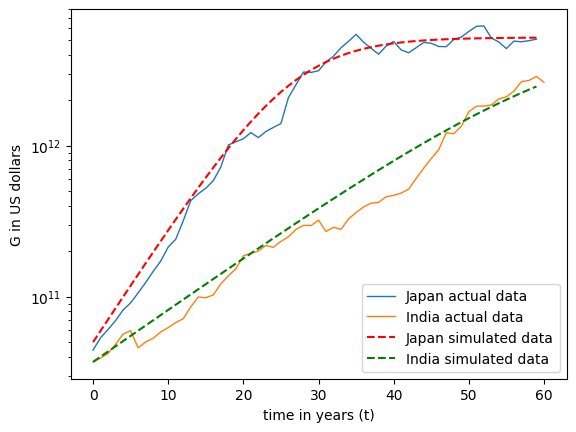

In [ ]:
k_gdp_india=6e12
a_gdp_india = 0.080
x_0_gdp_india = 3.7e10
simulated_gdp_india = logistic_equation(df['year'],x_0_gdp_india,k_gdp_india,a_gdp_india)



k_gdp_japan=5.2e12
a_gdp_japan = 0.175
x_0_gdp_japan = 5e10
simulated_gdp_japan = logistic_equation(df['year'],x_0_gdp_japan,k_gdp_japan,a_gdp_japan)


plt.yscale('log')


plt.plot(df_japan['year'], df_japan['annual_gdp'],lw=1)
plt.plot(df_india['year'], df_india['annual_gdp'],lw=1)
plt.plot(df_japan['year'],simulated_gdp_japan, linestyle='dashed', color='r')
plt.plot(df_japan['year'],simulated_gdp_india, linestyle='dashed', color='g')
plt.xlabel('time in years (t)')
plt.ylabel('G in US dollars')
plt.legend(['Japan actual data','India actual data','Japan simulated data','India simulated data'])
plt.yscale('log')


plt.show()


In [ ]:
headers = ['Column1']
df_UK = pd.read_csv('/content/drive/MyDrive/ModSim Data/UK_GDP_Trade.dat',delimiter='\t', header=None, names=headers)
# Split each string in the 'Column1' into a list of numbers
df_UK['Column1'] = df_UK['Column1'].str.split()

# Expand the list of numbers into separate columns
df_UK = pd.concat([df_UK, df_UK['Column1'].apply(pd.Series).astype(float)], axis=1)

# Drop the original 'Column1' with strings
df_UK.drop('Column1', axis=1, inplace=True)

new_columns = {0: 'year',
               1: 'annual_gdp',
               2:'annual_trade'}
df_UK.rename(columns=new_columns,inplace=True)
df_UK['year'] = df_UK['year'].astype(int)
# df_UK['year'] = df_UK['year'] + 1913
df_UK
headers = ['Column1']
df_Germany = pd.read_csv('/content/drive/MyDrive/ModSim Data/Germany_GDP_Trade.dat',delimiter='\t', header=None, names=headers)
# Split each string in the 'Column1' into a list of numbers
df_Germany['Column1'] = df_Germany['Column1'].str.split()

# Expand the list of numbers into separate columns
df_Germany = pd.concat([df_Germany, df_Germany['Column1'].apply(pd.Series).astype(float)], axis=1)

# Drop the original 'Column1' with strings
df_Germany.drop('Column1', axis=1, inplace=True)

new_columns = {0: 'year',
               1: 'annual_gdp',
               2:'annual_trade'}
df_Germany.rename(columns=new_columns,inplace=True)
df_Germany['year'] = df_Germany['year'].astype(int)+10
# df_Germany['year'] = df_Germany['year'] + 1913
df_Germany

,year,annual_gdp,annual_trade
0,10,1.103548e+11,3.499428e+10
1,11,1.278152e+11,3.942301e+10
2,12,1.532836e+11,4.710821e+10
3,13,2.036886e+11,6.457583e+10
4,14,2.276808e+11,8.413472e+10
5,15,2.508530e+11,9.007342e+10
6,16,2.657394e+11,1.019646e+11
7,17,3.070264e+11,1.169892e+11
8,18,3.785986e+11,1.407652e+11
9,19,4.506062e+11,1.767483e+11


In [ ]:
# headers = ['Column1']
# df_germany = pd.read_csv('/content/drive/MyDrive/ModSim Data/Germany_GDP_Trade.dat',delimiter='\t', header=None, names=headers)
# # Split each string in the 'Column1' into a list of numbers
# df_germany['Column1'] = df_germany['Column1'].str.split()

# # Expand the list of numbers into separate columns
# df_germany = pd.concat([df_germany, df_germany['Column1'].apply(pd.Series).astype(float)], axis=1)

# # Drop the original 'Column1' with strings
# df_germany.drop('Column1', axis=1, inplace=True)

# new_columns = {0: 'year',
#                1: 'annual_gdp',
#                2:'annual_trade'}
# df_germany.rename(columns=new_columns,inplace=True)
# df_germany['year'] = df_germany['year'].astype(int)
# # df_germany['year'] = df_germany['year'] + 1913
# df_germany


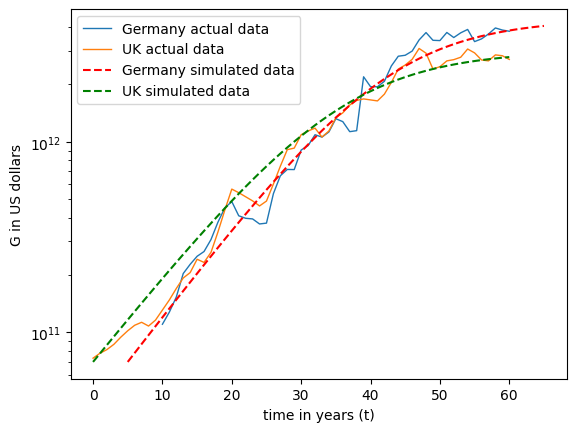

In [ ]:
k_gdp_Germany=4.4e12
a_gdp_Germany = 0.11
x_0_gdp_Germany = 7e10

k_gdp_UK=3e12
a_gdp_UK = 0.105
x_0_gdp_UK = 7e10

simulated_gdp_UK = logistic_equation(df_UK['year'],x_0_gdp_UK,k_gdp_UK,a_gdp_UK)
simulated_gdp_Germany = logistic_equation(df_UK['year'],x_0_gdp_Germany,k_gdp_Germany,a_gdp_Germany)



plt.plot(df_Germany['year'], df_Germany['annual_gdp'],lw=1)
plt.plot(df_UK['year'], df_UK['annual_gdp'],lw=1)
plt.plot(df_UK['year']+5,simulated_gdp_Germany, linestyle='dashed', color='r')
plt.plot(df_UK['year'],simulated_gdp_UK, linestyle='dashed', color='g')
plt.xlabel('time in years (t)')
plt.ylabel('G in US dollars')
plt.legend(['Germany actual data','UK actual data','Germany simulated data','UK simulated data'])
plt.yscale('log')


plt.show()


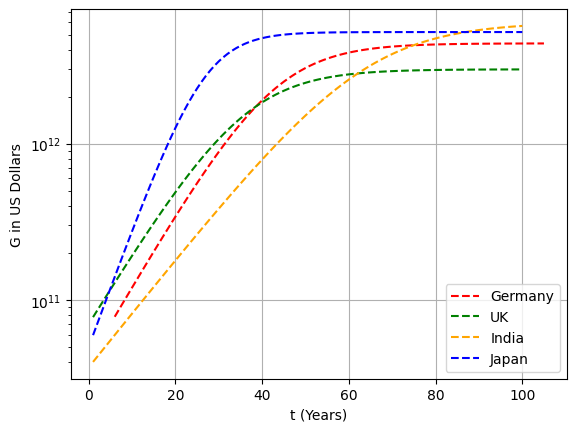

In [ ]:
df_year =  pd.DataFrame({'Year': range(1, 101)})
simulated_gdp_UK = logistic_equation(df_year,x_0_gdp_UK,k_gdp_UK,a_gdp_UK)
simulated_gdp_Germany = logistic_equation(df_year,x_0_gdp_Germany,k_gdp_Germany,a_gdp_Germany)
simulated_gdp_japan = logistic_equation(df_year,x_0_gdp_japan,k_gdp_japan,a_gdp_japan)
simulated_gdp_india = logistic_equation(df_year,x_0_gdp_india,k_gdp_india,a_gdp_india)
simulated_gdp_china = logistic_equation(df_year,x_0_gdp_china,k_gdp_china,a_gdp_china)
simulated_gdp_us = logistic_equation(df_year,x_0_gdp_us,k_gdp_us,a_gdp_us)

plt.plot(df_year+5,simulated_gdp_Germany, linestyle='dashed', color='r')
plt.plot(df_year,simulated_gdp_UK, linestyle='dashed', color='g')
# plt.plot(df_year,simulated_gdp_us, linestyle='dashed', color='b')
# plt.plot(df_year,simulated_gdp_china, linestyle='dashed', color='black')
plt.plot(df_year,simulated_gdp_india, linestyle='dashed', color='orange')
plt.plot(df_year,simulated_gdp_japan, linestyle='dashed', color='b')
plt.yscale('log')
plt.grid(True)
plt.legend(['Germany','UK','India','Japan'])
plt.xlabel("t (Years)")
plt.ylabel("G in US Dollars")

plt.show()
